<a href="https://colab.research.google.com/github/bspoloo/SIS420-012024/blob/main/Laboratorios/Laboratorio%205/Laboratorio_5_(Usando_Pytorch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 1 (MultiLayer Peceptron MLP) Grupo 1
 <h3>Implementacion del modelo MLP con el framework de Pytorch para realizar predicciones de clasificacion.<h3>
 <HR>
 <h3>
  NOMBRE: POLO ORELLANA BRAYAN SIMON <br>
  CARRERA: INGENIERIA EN CIENCIAS DE LA COMPUTACION<BR>
  FECHA: 04/08/2025<BR>
  
  * [Enlace al GitLab](https://gitlab.com/bspoloo/sis421-022025/-/tree/main/Laboratorios/Laboratorio%201?ref_type=heads)
 <h3>

Para el laboratorio hizo uso del dataset `csgo_roun_snapshots.csv` para entrenar el modelo de **MLP** usando la libreria de **pythorch** y si en una partida de counter strike el equipo ganador entre **terrorista** y **antiterrorista**.

El enlace al dataset es [CS:GO Round Winner Classification](https://www.kaggle.com/datasets/christianlillelund/csgo-round-winner-classification).

El archivo `csgo_roun_snapshots.csv` cuenta con un conjunto de datos consta de instantáneas de rondas de aproximadamente 700 demostraciones de torneos de alto nivel en 2019 y 2020. Se filtraron las rondas de calentamiento y los reinicios, y para las rondas en vivo restantes se registró una instantánea de la ronda cada 20 segundos hasta que se decide la ronda..

Importamos la librerias necesarias:

In [33]:
# Used for directory and path manipulation
import os
# Scientific and vector computation for Python
import numpy as np
# Library for graphics
from matplotlib import pyplot as plt
#Para separa el 20% y 80%
from sklearn.model_selection import train_test_split
import pandas as pd

import torch
from torch import optim  # Para optimizadores como SGD, Adam, etc.
from torch import nn  # Todos los módulos de redes neuronales
from torch.utils.data import DataLoader  # Facilita la gestión de conjuntos de datos creando mini lotes, etc.

import torchvision  # Paquete torch para cosas relacionadas con la visión
import torchvision.transforms as transforms  # Transformaciones que podemos realizar en nuestro conjunto de datos para aumentar
import torch.nn.functional as F  # Funciones sin parámetros, como (algunas) funciones de activación
import torchvision.datasets as datasets  # Conjuntos de datos estándar
from tqdm import tqdm  # ¡Para una barra de progreso agradable!
from torch.utils.data import Dataset

# Le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [34]:
# from google.colab import drive
# drive.mount("/content/gdrive")

## Red neuronal (Pytorch)

### Cargamos los datos del dataset
cargamos los datos haciendo el uso de la libreria **Pandas** que  es una herramienta poderosa y versátil utilizada para manipulación y análisis de datos. Ofrece estructuras de datos flexibles y eficientes para trabajar con datos tabulares, como hojas de cálculo en Excel o tablas SQL. Algunas de las funcionalidades clave de pandas incluyen:

In [35]:
# dataset = pd.read_csv('/content/gdrive/MyDrive/Datasets/csgo_round_snapshots.csv', delimiter=',')

dataset = pd.read_csv('csgo_round_snapshots.csv', delimiter=',')

#para usarlo a travez de google colab
# dataset = dataset.sample(n=20000, random_state=42)

dataset

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,T
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,T


### Analisis del dataset

para tener una mejor vista del los tipos de datos del dataset, hacemos un `info()`:

In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

Se puede observar que hay columnas con datos que no son numeros, por lo tanto se procede a tratarlos:

In [37]:
#para contar cuantas clases contiene nuestra columna
class_counts1 = dataset["map"].value_counts()
class_counts2 = dataset["bomb_planted"].value_counts()
class_counts3 = dataset["round_winner"].value_counts()

#mostramos la cantidad de clases tiene, y en que cantidad
class_counts1

map
de_inferno     23811
de_dust2       22144
de_nuke        19025
de_mirage      18576
de_overpass    14081
de_train       13491
de_vertigo     11137
de_cache         145
Name: count, dtype: int64

In [38]:
class_counts2

bomb_planted
False    108726
True      13684
Name: count, dtype: int64

In [39]:
class_counts3

round_winner
T     62406
CT    60004
Name: count, dtype: int64

podemo notar que todos son de tipo float, por lo cual no nos traera problemas al momento de entrenar el modelo.

cambiamos todos los string que a numeros:

In [40]:
dataset['map'] = dataset['map'].map({'de_inferno': 0, 'de_dust2': 1, 'de_nuke': 2, 'de_mirage': 3, 'de_overpass': 4, 'de_train': 5, 'de_vertigo': 6, 'de_cache': 7})
dataset['bomb_planted'] = dataset['bomb_planted'].map({False: 0, True: 1})
dataset['round_winner'] = dataset['round_winner'].map({'T': 0, 'CT': 1})


Mostramos el dataset ya con todos los valores numericos:


In [41]:
dataset

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,1,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,156.03,0.0,0.0,1,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,96.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,76.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,174.97,1.0,0.0,1,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,5,1,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
122406,174.93,11.0,15.0,5,0,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
122407,114.93,11.0,15.0,5,0,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,0
122408,94.93,11.0,15.0,5,0,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0


### Separamos los datos de nuestra columna Y para cada clase:

In [42]:
# hacemos uso del DataFrame llamado 'dataset' que contiene nuestros datos datos
# y es la columna que contiene las etiquetas de clase (en este caso, 'round_winner')

#creamos una variable temporal que contentra toda la columna de 'round_winner'
y_temp = dataset['round_winner']

# Para la clase 0

#donde y_temp es igual a 0, separamos los datos en train_class_0, test_class_0
data_class_0 = dataset[y_temp == 0]
train_class_0, test_class_0 = train_test_split(data_class_0, test_size=0.2, random_state=42)

# Para la clase 1

#donde y_temp es igual a 1, separamos los datos en train_class_1, test_class_1
data_class_1 = dataset[y_temp == 1]
train_class_1, test_class_1 = train_test_split(data_class_1, test_size=0.2, random_state=42)

In [43]:
print(f"Para la clase 0 tenemos una cantidad de: { data_class_0.shape[0]} donde el 80% es: {train_class_0.shape[0]} y el 20% es: {test_class_0.shape[0]}")
print(f"Para la clase 1 tenemos una cantidad de: { data_class_1.shape[0]} donde el 80% es: {train_class_1.shape[0]} y el 20% es: {test_class_1.shape[0]}")
print(f"La cantidad total de datos es: {dataset.shape[0]}")

Para la clase 0 tenemos una cantidad de: 62406 donde el 80% es: 49924 y el 20% es: 12482
Para la clase 1 tenemos una cantidad de: 60004 donde el 80% es: 48003 y el 20% es: 12001
La cantidad total de datos es: 122410


### Separacion del 80% de los datos para entrenamiento y 20% para pruebas

Haremos uso de la libreria `sklearn` haciendo uso de su funcion `train_test_split()`, donde recibe como parametros:

`Arrays o matrices de características (X): `Estos son los datos que se utilizarán para hacer predicciones. Por lo general, son las variables independientes o características del conjunto de datos.

`test_size (opcional):` Este parámetro especifica el tamaño del conjunto de prueba. Puede ser un número decimal entre 0 y 1, que representa el porcentaje del conjunto de datos que se asignará al conjunto de prueba, o puede ser un entero que representa el número absoluto de muestras en el conjunto de prueba. Por ejemplo, si test_size=0.2, se asignará el 20% del conjunto de datos al conjunto de prueba.

`train_size (opcional):` Este parámetro especifica el tamaño del conjunto de entrenamiento. Al igual que test_size, puede ser un número decimal entre 0 y 1 o un entero que representa el número absoluto de muestras en el conjunto de entrenamiento. Si no se proporciona, se calcula automáticamente como 1 - test_size.

`random_state (opcional):` Este parámetro permite establecer una semilla para la generación de números pseudoaleatorios. Esto garantiza que la división de los datos sea reproducible. Si se establece en un número entero, el resultado será el mismo cada vez que se ejecute el código.

In [44]:
#separando los datos de entrenamiento y pruebas

#para los datos de entrenamiento
train_dataset = pd.concat([train_class_0, train_class_1]).values
test_dataset = pd.concat([test_class_0, test_class_1]).values


indices_train = np.random.permutation(len(train_dataset))
indices_test = np.random.permutation(len(test_dataset))

train_dataset = pd.concat([train_class_0, train_class_1]).values

train_dataset = train_dataset[indices_train]
train_test = test_dataset[indices_test]

m_train = len(train_dataset)
m_test = len(test_dataset)

In [45]:
print(m_train)
print(m_test)
print("El total de ejemplos es: ", (m_train + m_test))

97927
24483
El total de ejemplos es:  122410


#### Convertimos los datos a tensores de Pythorch

Este código conviertimos los datos **train_dataset** y **Test_dataset** en tensores de PyTorch.

Creamos la clase  indicar a PyTorch cuáles son los datos de entrada (features) y cuáles son las etiquetas (targets), creamnos una clase personalizada que herede de torch.utils.data.Dataset y sobrescribir los métodos **__len__** y **__getitem__.**

In [46]:
class TuConjuntoDatos(Dataset):
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        features = torch.tensor(self.data[idx, :-1], dtype=torch.float32)  # Todas las columnas excepto la última
        target = torch.tensor(self.data[idx, -1], dtype=torch.long)  # Última columna (etiqueta)
        return features, target

    def get_features_shape(self):
        return (self.data.shape[1] - 1)

hacemos uso de la clase anterior, indicando cual es nuestra columna "target", en este caso la ultima, **-1**:

In [47]:
train_dataset = TuConjuntoDatos(train_dataset, -1)  # No se necesitan etiquetas durante el entrenamiento
test_dataset = TuConjuntoDatos(test_dataset, -1)

In [48]:
print(f"el 80% de datos es:{len(train_dataset)} y el 20% es: {len(test_dataset)}")
print( "la totalidad de datos es: ", dataset.shape[0])

el 80% de datos es:97927 y el 20% es: 24483
la totalidad de datos es:  122410


### Creacion de la clase de Red neuronal MLS

Aquí creamos nuestra red neuronal simple. Para más detalles aquí estamos subclasificando y
Heredando de **nn.Module**.

In [49]:
class RedNeuronalMLS(nn.Module):
    def __init__(self, input_size, num_classes):
        super(RedNeuronalMLS, self).__init__()
        self.fc1 = nn.Linear(input_size, 50)
        self.fc2 = nn.Linear(50, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = F.sigmoid(x)
        x = self.fc2(x)
        return x

### Definimos la arquitectura del modelo

En este apartado definiremos la cantidad de capas que tendra el modelo:

- **Capa de entrada:** Es la cantidad de caracteristicas con las que cuenta el dataset.
- **Capa de salida:** como este modelo cuenta con dos clases, por lo tanto solo tendra un valor de 2

In [50]:
# Configurando parametros necesario
input_layer_size = train_dataset.get_features_shape() # Entrada de 96 caracteristicas, es la cantidad de columnas existente en el dataset
num_labels = 2         # como es una clasificacion tiene solo 2 salidas

print("la cantidad de elementos en la capa de entrada es: ",input_layer_size)
print("la cantidad de elementos en la capa de salida es: ",num_labels)

la cantidad de elementos en la capa de entrada es:  96
la cantidad de elementos en la capa de salida es:  2


#### Hiperparametros:

Hiperparámetros de nuestra red neuronal que dependen del conjunto de datos, y
También simplemente experimentando para ver qué funciona bien (tasa de aprendizaje, por ejemplo).

In [51]:
input_size = input_layer_size
num_classes = num_labels
learning_rate = 0.001
batch_size = 1000
num_epochs = 200

print("la cantidad de elementos en la entrada es: ",input_size)

la cantidad de elementos en la entrada es:  96


#### Verificamos que el GPU este habilitado


Este código sirve para configurar el dispositivo en el que se ejecutarán los cálculos de PyTorch. Si una GPU está disponible en el sistema, el código configura el dispositivo para usar la GPU (CUDA), de lo contrario, se configura para utilizar la CPU.

In [52]:
# Configuramos el dispositivo cuda para GPU si está disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


#### Cargamos conjuntos de datos en lotes:

* **dataset:** El conjunto de datos que se va a cargar en lotes. En este caso, * * * train_dataset y test_dataset son los conjuntos de datos de entrenamiento y prueba, respectivamente.
* **batch_size:** El tamaño de los lotes de datos. Especifica cuántas muestras se cargarán a la vez durante el entrenamiento o la evaluación.
* **shuffle:** Un booleano que indica si se deben mezclar los datos antes de cargarlos en lotes. Esto es útil durante el entrenamiento para evitar que el modelo aprenda patrones basados en el orden de los datos.

In [53]:
print(len(train_dataset))
print(len(test_dataset))

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

print("la cantidad de lotes para el dataset de entrenamiento es: ",len(train_loader))
print("la cantidad de lotes para el dataset de prueba es: ",len(test_loader))

97927
24483
la cantidad de lotes para el dataset de entrenamiento es:  98
la cantidad de lotes para el dataset de prueba es:  25


### Modelo de red neuronal

Este código crea una instancia de un modelo de red neuronal y lo mueve al dispositivo especificado (ya sea GPU o CPU) para su entrenamiento y evaluación.

* **RedNeuronalMLS:** Usamos la clase para crear el modelo.
* **input_size:** es el tamaño de entrada del modelo, es decir, el número de características en cada ejemplo de entrada.
num_classes es el número de clases en el problema de clasificación, es decir, el número de categorías diferentes a predecir.
* **.to(device):** mueve el modelo a la GPU (cuda) si está disponible, de lo contrario, lo deja en la CPU (cpu).

In [54]:
# Initialize network
model = RedNeuronalMLS(input_size=input_size, num_classes=num_classes).to(device)

Mostramos algunas caracteristicas del modelo:

In [55]:
model

RedNeuronalMLS(
  (fc1): Linear(in_features=96, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=2, bias=True)
)

#### Funcion de perdida o costo para el modelo:

como este es un modelo de clasificacion, se procede a crearlo con la funcion de **CrossEntropyLoss()** y el optimizador creando una instancia del **optimizador Adam**.

In [56]:
# Perdida y optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

### Entrenamiento de la Red neuronal

Haciendo el uso dos ciclos For, en el primero para el uso del los **"epochs"** el cual ira iterando uno por uno dentro del segundo For, el c se recorre el cargador de datos de entrenamiento **(train_loader)** para obtener lotes **(batches)** de datos y sus respectivas etiquetas. **batch_idx **es el índice del lote actual, data contiene las entradas del lote y targets contiene las etiquetas correspondientes.

In [57]:
# Listas para almacenar métricas
train_losses = []
train_accuracies = []

# Train Network
for epoch in range(num_epochs):
    model.train()  # Modo entrenamiento
    running_loss = 0.0
    correct = 0
    total = 0
    
    for batch_idx, (data, targets) in enumerate(tqdm(train_loader)):
        # Obtenemos el CUDA si es posible
        data = data.to(device=device)
        targets = targets.to(device=device)

        # Llegar a la forma correcta
        data = data.reshape(data.shape[0], -1)

        # forward
        scores = model(data)
        loss = criterion(scores, targets)

        # backward
        optimizer.zero_grad()
        loss.backward()

        # gradient descent or adam step
        optimizer.step()

        # Calcular métricas
        running_loss += loss.item()
        
        # Calcular accuracy
        _, predicted = scores.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    # Calcular métricas promedio por época
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100. * correct / total
    
    # Almacenar métricas
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%')

100%|██████████| 98/98 [00:01<00:00, 77.08it/s]


Epoch [1/200], Loss: 0.6362, Accuracy: 63.54%


100%|██████████| 98/98 [00:01<00:00, 77.78it/s]


Epoch [2/200], Loss: 0.5621, Accuracy: 71.69%


100%|██████████| 98/98 [00:01<00:00, 80.97it/s]


Epoch [3/200], Loss: 0.5296, Accuracy: 73.02%


100%|██████████| 98/98 [00:01<00:00, 83.79it/s]


Epoch [4/200], Loss: 0.5208, Accuracy: 72.96%


100%|██████████| 98/98 [00:01<00:00, 85.39it/s] 


Epoch [5/200], Loss: 0.5153, Accuracy: 72.83%


100%|██████████| 98/98 [00:01<00:00, 85.20it/s] 


Epoch [6/200], Loss: 0.5094, Accuracy: 72.77%


100%|██████████| 98/98 [00:01<00:00, 85.97it/s] 


Epoch [7/200], Loss: 0.5129, Accuracy: 73.24%


100%|██████████| 98/98 [00:01<00:00, 84.88it/s]


Epoch [8/200], Loss: 0.5195, Accuracy: 72.33%


100%|██████████| 98/98 [00:01<00:00, 85.81it/s] 


Epoch [9/200], Loss: 0.5126, Accuracy: 72.59%


100%|██████████| 98/98 [00:01<00:00, 81.39it/s]


Epoch [10/200], Loss: 0.5057, Accuracy: 73.10%


100%|██████████| 98/98 [00:01<00:00, 82.57it/s]


Epoch [11/200], Loss: 0.5041, Accuracy: 72.97%


100%|██████████| 98/98 [00:01<00:00, 93.86it/s]


Epoch [12/200], Loss: 0.5055, Accuracy: 73.18%


100%|██████████| 98/98 [00:01<00:00, 86.03it/s]


Epoch [13/200], Loss: 0.5054, Accuracy: 73.12%


100%|██████████| 98/98 [00:01<00:00, 94.96it/s] 


Epoch [14/200], Loss: 0.5040, Accuracy: 73.18%


100%|██████████| 98/98 [00:01<00:00, 86.43it/s]


Epoch [15/200], Loss: 0.5024, Accuracy: 73.18%


100%|██████████| 98/98 [00:01<00:00, 86.99it/s]


Epoch [16/200], Loss: 0.5051, Accuracy: 72.88%


100%|██████████| 98/98 [00:01<00:00, 84.25it/s]


Epoch [17/200], Loss: 0.5025, Accuracy: 73.23%


100%|██████████| 98/98 [00:01<00:00, 84.16it/s]


Epoch [18/200], Loss: 0.5024, Accuracy: 73.01%


100%|██████████| 98/98 [00:01<00:00, 80.17it/s]


Epoch [19/200], Loss: 0.5005, Accuracy: 73.22%


100%|██████████| 98/98 [00:01<00:00, 80.50it/s]


Epoch [20/200], Loss: 0.5040, Accuracy: 73.11%


100%|██████████| 98/98 [00:01<00:00, 85.46it/s]


Epoch [21/200], Loss: 0.5048, Accuracy: 72.71%


100%|██████████| 98/98 [00:01<00:00, 85.15it/s]


Epoch [22/200], Loss: 0.5081, Accuracy: 72.78%


100%|██████████| 98/98 [00:01<00:00, 85.36it/s]


Epoch [23/200], Loss: 0.4997, Accuracy: 73.18%


100%|██████████| 98/98 [00:01<00:00, 83.94it/s]


Epoch [24/200], Loss: 0.5004, Accuracy: 73.28%


100%|██████████| 98/98 [00:01<00:00, 84.61it/s]


Epoch [25/200], Loss: 0.5045, Accuracy: 73.20%


100%|██████████| 98/98 [00:01<00:00, 85.66it/s]


Epoch [26/200], Loss: 0.5026, Accuracy: 73.04%


100%|██████████| 98/98 [00:01<00:00, 85.11it/s]


Epoch [27/200], Loss: 0.5068, Accuracy: 72.64%


100%|██████████| 98/98 [00:01<00:00, 84.72it/s]


Epoch [28/200], Loss: 0.4997, Accuracy: 73.04%


100%|██████████| 98/98 [00:01<00:00, 85.59it/s]


Epoch [29/200], Loss: 0.5041, Accuracy: 73.10%


100%|██████████| 98/98 [00:01<00:00, 83.62it/s]


Epoch [30/200], Loss: 0.5053, Accuracy: 73.06%


100%|██████████| 98/98 [00:01<00:00, 86.12it/s]


Epoch [31/200], Loss: 0.4938, Accuracy: 73.38%


100%|██████████| 98/98 [00:01<00:00, 84.20it/s]


Epoch [32/200], Loss: 0.5015, Accuracy: 73.03%


100%|██████████| 98/98 [00:01<00:00, 85.48it/s]


Epoch [33/200], Loss: 0.5018, Accuracy: 73.11%


100%|██████████| 98/98 [00:01<00:00, 83.83it/s]


Epoch [34/200], Loss: 0.5003, Accuracy: 73.00%


100%|██████████| 98/98 [00:01<00:00, 85.90it/s]


Epoch [35/200], Loss: 0.5077, Accuracy: 72.71%


100%|██████████| 98/98 [00:01<00:00, 84.77it/s]


Epoch [36/200], Loss: 0.5019, Accuracy: 72.86%


100%|██████████| 98/98 [00:01<00:00, 81.47it/s]


Epoch [37/200], Loss: 0.5021, Accuracy: 72.61%


100%|██████████| 98/98 [00:01<00:00, 85.43it/s]


Epoch [38/200], Loss: 0.5009, Accuracy: 72.89%


100%|██████████| 98/98 [00:01<00:00, 84.86it/s]


Epoch [39/200], Loss: 0.4977, Accuracy: 73.00%


100%|██████████| 98/98 [00:01<00:00, 84.84it/s]


Epoch [40/200], Loss: 0.4928, Accuracy: 73.20%


100%|██████████| 98/98 [00:01<00:00, 85.46it/s]


Epoch [41/200], Loss: 0.4993, Accuracy: 73.19%


100%|██████████| 98/98 [00:01<00:00, 84.84it/s]


Epoch [42/200], Loss: 0.4957, Accuracy: 73.30%


100%|██████████| 98/98 [00:01<00:00, 85.81it/s]


Epoch [43/200], Loss: 0.4973, Accuracy: 73.37%


100%|██████████| 98/98 [00:01<00:00, 84.58it/s]


Epoch [44/200], Loss: 0.4932, Accuracy: 73.31%


100%|██████████| 98/98 [00:01<00:00, 85.57it/s]


Epoch [45/200], Loss: 0.4949, Accuracy: 73.67%


100%|██████████| 98/98 [00:01<00:00, 84.23it/s]


Epoch [46/200], Loss: 0.5007, Accuracy: 73.40%


100%|██████████| 98/98 [00:01<00:00, 85.24it/s]


Epoch [47/200], Loss: 0.4955, Accuracy: 73.39%


100%|██████████| 98/98 [00:01<00:00, 85.55it/s]


Epoch [48/200], Loss: 0.5010, Accuracy: 73.25%


100%|██████████| 98/98 [00:01<00:00, 84.74it/s]


Epoch [49/200], Loss: 0.5005, Accuracy: 73.03%


100%|██████████| 98/98 [00:01<00:00, 84.44it/s]


Epoch [50/200], Loss: 0.5048, Accuracy: 72.54%


100%|██████████| 98/98 [00:01<00:00, 85.37it/s]


Epoch [51/200], Loss: 0.4974, Accuracy: 73.01%


100%|██████████| 98/98 [00:01<00:00, 84.31it/s]


Epoch [52/200], Loss: 0.4979, Accuracy: 73.16%


100%|██████████| 98/98 [00:01<00:00, 85.46it/s]


Epoch [53/200], Loss: 0.4951, Accuracy: 72.99%


100%|██████████| 98/98 [00:01<00:00, 85.55it/s]


Epoch [54/200], Loss: 0.4950, Accuracy: 73.24%


100%|██████████| 98/98 [00:01<00:00, 85.19it/s] 


Epoch [55/200], Loss: 0.4995, Accuracy: 72.90%


100%|██████████| 98/98 [00:01<00:00, 83.59it/s]


Epoch [56/200], Loss: 0.4954, Accuracy: 73.17%


100%|██████████| 98/98 [00:01<00:00, 84.63it/s]


Epoch [57/200], Loss: 0.4990, Accuracy: 73.00%


100%|██████████| 98/98 [00:01<00:00, 84.71it/s]


Epoch [58/200], Loss: 0.4942, Accuracy: 73.37%


100%|██████████| 98/98 [00:01<00:00, 82.99it/s]


Epoch [59/200], Loss: 0.4920, Accuracy: 73.39%


100%|██████████| 98/98 [00:01<00:00, 85.21it/s] 


Epoch [60/200], Loss: 0.4928, Accuracy: 73.53%


100%|██████████| 98/98 [00:01<00:00, 85.02it/s] 


Epoch [61/200], Loss: 0.5020, Accuracy: 73.04%


100%|██████████| 98/98 [00:01<00:00, 87.86it/s] 


Epoch [62/200], Loss: 0.4937, Accuracy: 73.30%


100%|██████████| 98/98 [00:01<00:00, 82.92it/s] 


Epoch [63/200], Loss: 0.4927, Accuracy: 73.30%


100%|██████████| 98/98 [00:01<00:00, 92.59it/s]


Epoch [64/200], Loss: 0.4944, Accuracy: 73.25%


100%|██████████| 98/98 [00:01<00:00, 86.39it/s] 


Epoch [65/200], Loss: 0.4904, Accuracy: 73.57%


100%|██████████| 98/98 [00:01<00:00, 96.14it/s] 


Epoch [66/200], Loss: 0.4945, Accuracy: 73.36%


100%|██████████| 98/98 [00:01<00:00, 64.80it/s]


Epoch [67/200], Loss: 0.4930, Accuracy: 73.54%


100%|██████████| 98/98 [00:01<00:00, 59.79it/s]


Epoch [68/200], Loss: 0.4906, Accuracy: 73.70%


100%|██████████| 98/98 [00:01<00:00, 56.99it/s]


Epoch [69/200], Loss: 0.4959, Accuracy: 73.49%


100%|██████████| 98/98 [00:01<00:00, 59.09it/s]


Epoch [70/200], Loss: 0.4901, Accuracy: 73.36%


100%|██████████| 98/98 [00:01<00:00, 60.14it/s]


Epoch [71/200], Loss: 0.4924, Accuracy: 73.30%


100%|██████████| 98/98 [00:01<00:00, 59.40it/s]


Epoch [72/200], Loss: 0.4966, Accuracy: 73.53%


100%|██████████| 98/98 [00:01<00:00, 60.51it/s]


Epoch [73/200], Loss: 0.4956, Accuracy: 73.23%


100%|██████████| 98/98 [00:01<00:00, 58.25it/s]


Epoch [74/200], Loss: 0.4924, Accuracy: 73.37%


100%|██████████| 98/98 [00:01<00:00, 57.89it/s]


Epoch [75/200], Loss: 0.4896, Accuracy: 74.02%


100%|██████████| 98/98 [00:01<00:00, 59.76it/s]


Epoch [76/200], Loss: 0.4895, Accuracy: 73.40%


100%|██████████| 98/98 [00:01<00:00, 60.48it/s]


Epoch [77/200], Loss: 0.4934, Accuracy: 73.31%


100%|██████████| 98/98 [00:01<00:00, 60.32it/s]


Epoch [78/200], Loss: 0.4914, Accuracy: 73.75%


100%|██████████| 98/98 [00:01<00:00, 57.59it/s]


Epoch [79/200], Loss: 0.4982, Accuracy: 72.92%


100%|██████████| 98/98 [00:01<00:00, 57.65it/s]


Epoch [80/200], Loss: 0.4951, Accuracy: 73.47%


100%|██████████| 98/98 [00:01<00:00, 58.97it/s]


Epoch [81/200], Loss: 0.4932, Accuracy: 73.44%


100%|██████████| 98/98 [00:01<00:00, 60.60it/s]


Epoch [82/200], Loss: 0.4882, Accuracy: 73.34%


100%|██████████| 98/98 [00:01<00:00, 59.27it/s]


Epoch [83/200], Loss: 0.4898, Accuracy: 73.61%


100%|██████████| 98/98 [00:01<00:00, 57.03it/s]


Epoch [84/200], Loss: 0.4913, Accuracy: 73.62%


100%|██████████| 98/98 [00:01<00:00, 59.74it/s]


Epoch [85/200], Loss: 0.4967, Accuracy: 73.24%


100%|██████████| 98/98 [00:01<00:00, 58.65it/s]


Epoch [86/200], Loss: 0.4939, Accuracy: 73.23%


100%|██████████| 98/98 [00:01<00:00, 60.64it/s]


Epoch [87/200], Loss: 0.4928, Accuracy: 73.41%


100%|██████████| 98/98 [00:01<00:00, 59.57it/s]


Epoch [88/200], Loss: 0.4871, Accuracy: 74.00%


100%|██████████| 98/98 [00:01<00:00, 57.27it/s]


Epoch [89/200], Loss: 0.4897, Accuracy: 73.59%


100%|██████████| 98/98 [00:01<00:00, 58.85it/s]


Epoch [90/200], Loss: 0.4879, Accuracy: 74.06%


100%|██████████| 98/98 [00:01<00:00, 58.62it/s]


Epoch [91/200], Loss: 0.4909, Accuracy: 73.82%


100%|██████████| 98/98 [00:01<00:00, 84.20it/s]


Epoch [92/200], Loss: 0.4898, Accuracy: 73.83%


100%|██████████| 98/98 [00:01<00:00, 84.83it/s]


Epoch [93/200], Loss: 0.4911, Accuracy: 73.49%


100%|██████████| 98/98 [00:01<00:00, 84.06it/s]


Epoch [94/200], Loss: 0.4934, Accuracy: 73.21%


100%|██████████| 98/98 [00:01<00:00, 84.77it/s]


Epoch [95/200], Loss: 0.4958, Accuracy: 73.24%


100%|██████████| 98/98 [00:01<00:00, 84.22it/s]


Epoch [96/200], Loss: 0.4895, Accuracy: 73.41%


100%|██████████| 98/98 [00:01<00:00, 84.18it/s]


Epoch [97/200], Loss: 0.4934, Accuracy: 73.33%


100%|██████████| 98/98 [00:01<00:00, 84.34it/s]


Epoch [98/200], Loss: 0.4943, Accuracy: 73.46%


100%|██████████| 98/98 [00:01<00:00, 83.68it/s]


Epoch [99/200], Loss: 0.4889, Accuracy: 73.67%


100%|██████████| 98/98 [00:01<00:00, 94.84it/s]


Epoch [100/200], Loss: 0.4911, Accuracy: 73.49%


100%|██████████| 98/98 [00:01<00:00, 84.90it/s]


Epoch [101/200], Loss: 0.4872, Accuracy: 73.74%


100%|██████████| 98/98 [00:01<00:00, 94.10it/s]


Epoch [102/200], Loss: 0.4968, Accuracy: 73.44%


100%|██████████| 98/98 [00:01<00:00, 87.45it/s]


Epoch [103/200], Loss: 0.4880, Accuracy: 73.82%


100%|██████████| 98/98 [00:01<00:00, 85.65it/s]


Epoch [104/200], Loss: 0.4894, Accuracy: 73.74%


100%|██████████| 98/98 [00:01<00:00, 85.05it/s]


Epoch [105/200], Loss: 0.4922, Accuracy: 73.53%


100%|██████████| 98/98 [00:01<00:00, 84.21it/s]


Epoch [106/200], Loss: 0.4982, Accuracy: 73.59%


100%|██████████| 98/98 [00:01<00:00, 84.70it/s]


Epoch [107/200], Loss: 0.4963, Accuracy: 73.10%


100%|██████████| 98/98 [00:01<00:00, 85.11it/s]


Epoch [108/200], Loss: 0.5022, Accuracy: 73.07%


100%|██████████| 98/98 [00:01<00:00, 85.23it/s]


Epoch [109/200], Loss: 0.4924, Accuracy: 73.42%


100%|██████████| 98/98 [00:01<00:00, 85.57it/s]


Epoch [110/200], Loss: 0.4933, Accuracy: 73.33%


100%|██████████| 98/98 [00:01<00:00, 83.77it/s]


Epoch [111/200], Loss: 0.4929, Accuracy: 73.44%


100%|██████████| 98/98 [00:01<00:00, 83.44it/s]


Epoch [112/200], Loss: 0.4903, Accuracy: 73.68%


100%|██████████| 98/98 [00:01<00:00, 84.10it/s]


Epoch [113/200], Loss: 0.4891, Accuracy: 73.38%


100%|██████████| 98/98 [00:01<00:00, 85.70it/s]


Epoch [114/200], Loss: 0.4895, Accuracy: 73.33%


100%|██████████| 98/98 [00:01<00:00, 85.45it/s]


Epoch [115/200], Loss: 0.4930, Accuracy: 73.27%


100%|██████████| 98/98 [00:01<00:00, 84.84it/s]


Epoch [116/200], Loss: 0.4879, Accuracy: 73.85%


100%|██████████| 98/98 [00:01<00:00, 85.34it/s]


Epoch [117/200], Loss: 0.4919, Accuracy: 73.42%


100%|██████████| 98/98 [00:01<00:00, 85.33it/s] 


Epoch [118/200], Loss: 0.4864, Accuracy: 73.91%


100%|██████████| 98/98 [00:01<00:00, 83.35it/s]


Epoch [119/200], Loss: 0.4865, Accuracy: 73.76%


100%|██████████| 98/98 [00:01<00:00, 93.04it/s]


Epoch [120/200], Loss: 0.4863, Accuracy: 73.69%


100%|██████████| 98/98 [00:01<00:00, 84.77it/s]


Epoch [121/200], Loss: 0.4925, Accuracy: 73.26%


100%|██████████| 98/98 [00:01<00:00, 95.52it/s] 


Epoch [122/200], Loss: 0.4889, Accuracy: 73.74%


100%|██████████| 98/98 [00:01<00:00, 86.90it/s]


Epoch [123/200], Loss: 0.4904, Accuracy: 73.55%


100%|██████████| 98/98 [00:01<00:00, 85.65it/s]


Epoch [124/200], Loss: 0.4879, Accuracy: 73.58%


100%|██████████| 98/98 [00:01<00:00, 84.08it/s]


Epoch [125/200], Loss: 0.4900, Accuracy: 73.24%


100%|██████████| 98/98 [00:01<00:00, 85.71it/s]


Epoch [126/200], Loss: 0.4861, Accuracy: 73.70%


100%|██████████| 98/98 [00:01<00:00, 84.02it/s]


Epoch [127/200], Loss: 0.4902, Accuracy: 73.68%


100%|██████████| 98/98 [00:01<00:00, 83.96it/s]


Epoch [128/200], Loss: 0.4918, Accuracy: 73.54%


100%|██████████| 98/98 [00:01<00:00, 84.52it/s]


Epoch [129/200], Loss: 0.4888, Accuracy: 73.93%


100%|██████████| 98/98 [00:01<00:00, 83.50it/s]


Epoch [130/200], Loss: 0.4883, Accuracy: 73.75%


100%|██████████| 98/98 [00:01<00:00, 85.15it/s]


Epoch [131/200], Loss: 0.4907, Accuracy: 73.91%


100%|██████████| 98/98 [00:01<00:00, 84.74it/s]


Epoch [132/200], Loss: 0.4865, Accuracy: 73.83%


100%|██████████| 98/98 [00:01<00:00, 85.39it/s]


Epoch [133/200], Loss: 0.4860, Accuracy: 73.38%


100%|██████████| 98/98 [00:01<00:00, 78.46it/s]


Epoch [134/200], Loss: 0.4863, Accuracy: 73.53%


100%|██████████| 98/98 [00:01<00:00, 79.18it/s]


Epoch [135/200], Loss: 0.4896, Accuracy: 73.74%


100%|██████████| 98/98 [00:01<00:00, 82.00it/s]


Epoch [136/200], Loss: 0.4890, Accuracy: 73.51%


100%|██████████| 98/98 [00:01<00:00, 85.03it/s]


Epoch [137/200], Loss: 0.4887, Accuracy: 73.56%


100%|██████████| 98/98 [00:01<00:00, 80.60it/s]


Epoch [138/200], Loss: 0.4873, Accuracy: 73.61%


100%|██████████| 98/98 [00:01<00:00, 82.42it/s]


Epoch [139/200], Loss: 0.4850, Accuracy: 74.05%


100%|██████████| 98/98 [00:01<00:00, 94.09it/s]


Epoch [140/200], Loss: 0.4893, Accuracy: 73.84%


100%|██████████| 98/98 [00:01<00:00, 86.14it/s] 


Epoch [141/200], Loss: 0.4908, Accuracy: 73.60%


100%|██████████| 98/98 [00:01<00:00, 94.27it/s]


Epoch [142/200], Loss: 0.4888, Accuracy: 73.52%


100%|██████████| 98/98 [00:01<00:00, 86.85it/s]


Epoch [143/200], Loss: 0.4876, Accuracy: 73.54%


100%|██████████| 98/98 [00:01<00:00, 85.47it/s]


Epoch [144/200], Loss: 0.4913, Accuracy: 73.80%


100%|██████████| 98/98 [00:01<00:00, 84.99it/s]


Epoch [145/200], Loss: 0.4880, Accuracy: 73.61%


100%|██████████| 98/98 [00:01<00:00, 85.09it/s]


Epoch [146/200], Loss: 0.4889, Accuracy: 73.72%


100%|██████████| 98/98 [00:01<00:00, 83.50it/s]


Epoch [147/200], Loss: 0.4880, Accuracy: 73.75%


100%|██████████| 98/98 [00:01<00:00, 84.32it/s]


Epoch [148/200], Loss: 0.4924, Accuracy: 73.60%


100%|██████████| 98/98 [00:01<00:00, 84.71it/s]


Epoch [149/200], Loss: 0.4857, Accuracy: 73.66%


100%|██████████| 98/98 [00:01<00:00, 85.60it/s]


Epoch [150/200], Loss: 0.4861, Accuracy: 73.50%


100%|██████████| 98/98 [00:01<00:00, 85.38it/s]


Epoch [151/200], Loss: 0.4879, Accuracy: 73.39%


100%|██████████| 98/98 [00:01<00:00, 85.47it/s]


Epoch [152/200], Loss: 0.4881, Accuracy: 73.28%


100%|██████████| 98/98 [00:01<00:00, 85.10it/s]


Epoch [153/200], Loss: 0.4907, Accuracy: 73.53%


100%|██████████| 98/98 [00:01<00:00, 83.92it/s]


Epoch [154/200], Loss: 0.4891, Accuracy: 73.46%


100%|██████████| 98/98 [00:01<00:00, 83.98it/s]


Epoch [155/200], Loss: 0.4893, Accuracy: 73.53%


100%|██████████| 98/98 [00:01<00:00, 84.89it/s]


Epoch [156/200], Loss: 0.4902, Accuracy: 73.49%


100%|██████████| 98/98 [00:01<00:00, 85.23it/s]


Epoch [157/200], Loss: 0.4861, Accuracy: 73.75%


100%|██████████| 98/98 [00:01<00:00, 84.87it/s]


Epoch [158/200], Loss: 0.4836, Accuracy: 74.04%


100%|██████████| 98/98 [00:01<00:00, 84.34it/s]


Epoch [159/200], Loss: 0.4818, Accuracy: 74.23%


100%|██████████| 98/98 [00:01<00:00, 94.75it/s]


Epoch [160/200], Loss: 0.4845, Accuracy: 73.82%


100%|██████████| 98/98 [00:01<00:00, 83.76it/s]


Epoch [161/200], Loss: 0.4897, Accuracy: 73.25%


100%|██████████| 98/98 [00:01<00:00, 93.04it/s]


Epoch [162/200], Loss: 0.4874, Accuracy: 73.70%


100%|██████████| 98/98 [00:01<00:00, 86.60it/s]


Epoch [163/200], Loss: 0.4862, Accuracy: 74.06%


100%|██████████| 98/98 [00:01<00:00, 85.60it/s]


Epoch [164/200], Loss: 0.4945, Accuracy: 73.11%


100%|██████████| 98/98 [00:01<00:00, 85.04it/s]


Epoch [165/200], Loss: 0.4956, Accuracy: 73.38%


100%|██████████| 98/98 [00:01<00:00, 83.43it/s]


Epoch [166/200], Loss: 0.4899, Accuracy: 73.80%


100%|██████████| 98/98 [00:01<00:00, 85.29it/s]


Epoch [167/200], Loss: 0.4867, Accuracy: 73.83%


100%|██████████| 98/98 [00:01<00:00, 84.90it/s]


Epoch [168/200], Loss: 0.4856, Accuracy: 73.69%


100%|██████████| 98/98 [00:01<00:00, 83.58it/s]


Epoch [169/200], Loss: 0.4874, Accuracy: 73.74%


100%|██████████| 98/98 [00:01<00:00, 84.87it/s]


Epoch [170/200], Loss: 0.4869, Accuracy: 73.66%


100%|██████████| 98/98 [00:01<00:00, 84.52it/s]


Epoch [171/200], Loss: 0.4883, Accuracy: 73.55%


100%|██████████| 98/98 [00:01<00:00, 84.19it/s]


Epoch [172/200], Loss: 0.4951, Accuracy: 73.44%


100%|██████████| 98/98 [00:01<00:00, 83.93it/s]


Epoch [173/200], Loss: 0.4880, Accuracy: 73.41%


100%|██████████| 98/98 [00:01<00:00, 85.12it/s]


Epoch [174/200], Loss: 0.4874, Accuracy: 73.65%


100%|██████████| 98/98 [00:01<00:00, 85.09it/s]


Epoch [175/200], Loss: 0.4874, Accuracy: 73.31%


100%|██████████| 98/98 [00:01<00:00, 84.10it/s]


Epoch [176/200], Loss: 0.4833, Accuracy: 73.95%


100%|██████████| 98/98 [00:01<00:00, 81.87it/s]


Epoch [177/200], Loss: 0.4841, Accuracy: 73.68%


100%|██████████| 98/98 [00:01<00:00, 84.49it/s]


Epoch [178/200], Loss: 0.4896, Accuracy: 74.01%


100%|██████████| 98/98 [00:01<00:00, 82.80it/s]


Epoch [179/200], Loss: 0.4894, Accuracy: 73.57%


100%|██████████| 98/98 [00:01<00:00, 94.36it/s]


Epoch [180/200], Loss: 0.4897, Accuracy: 73.52%


100%|██████████| 98/98 [00:01<00:00, 84.92it/s] 


Epoch [181/200], Loss: 0.4912, Accuracy: 73.50%


100%|██████████| 98/98 [00:01<00:00, 94.62it/s] 


Epoch [182/200], Loss: 0.4894, Accuracy: 73.59%


100%|██████████| 98/98 [00:01<00:00, 86.54it/s]


Epoch [183/200], Loss: 0.4868, Accuracy: 73.69%


100%|██████████| 98/98 [00:01<00:00, 85.36it/s]


Epoch [184/200], Loss: 0.4897, Accuracy: 73.58%


100%|██████████| 98/98 [00:01<00:00, 83.96it/s]


Epoch [185/200], Loss: 0.4892, Accuracy: 73.63%


100%|██████████| 98/98 [00:01<00:00, 85.17it/s]


Epoch [186/200], Loss: 0.4853, Accuracy: 73.71%


100%|██████████| 98/98 [00:01<00:00, 84.56it/s]


Epoch [187/200], Loss: 0.4878, Accuracy: 73.85%


100%|██████████| 98/98 [00:01<00:00, 83.96it/s]


Epoch [188/200], Loss: 0.4906, Accuracy: 73.69%


100%|██████████| 98/98 [00:01<00:00, 84.53it/s]


Epoch [189/200], Loss: 0.4901, Accuracy: 73.55%


100%|██████████| 98/98 [00:01<00:00, 84.70it/s]


Epoch [190/200], Loss: 0.4854, Accuracy: 73.70%


100%|██████████| 98/98 [00:01<00:00, 82.17it/s]


Epoch [191/200], Loss: 0.4949, Accuracy: 73.43%


100%|██████████| 98/98 [00:01<00:00, 84.43it/s]


Epoch [192/200], Loss: 0.4879, Accuracy: 73.78%


100%|██████████| 98/98 [00:01<00:00, 83.72it/s]


Epoch [193/200], Loss: 0.4860, Accuracy: 73.79%


100%|██████████| 98/98 [00:01<00:00, 83.43it/s]


Epoch [194/200], Loss: 0.4863, Accuracy: 73.77%


100%|██████████| 98/98 [00:01<00:00, 85.10it/s]


Epoch [195/200], Loss: 0.4890, Accuracy: 73.66%


100%|██████████| 98/98 [00:01<00:00, 85.53it/s]


Epoch [196/200], Loss: 0.4878, Accuracy: 73.54%


100%|██████████| 98/98 [00:01<00:00, 85.72it/s]


Epoch [197/200], Loss: 0.4859, Accuracy: 73.54%


100%|██████████| 98/98 [00:01<00:00, 84.54it/s]


Epoch [198/200], Loss: 0.4870, Accuracy: 73.53%


100%|██████████| 98/98 [00:01<00:00, 81.73it/s]


Epoch [199/200], Loss: 0.4862, Accuracy: 73.67%


100%|██████████| 98/98 [00:01<00:00, 92.53it/s]

Epoch [200/200], Loss: 0.4877, Accuracy: 73.69%


### validaciones

Para hacer las validaciones correspondientes, se **creo check_accuracy()** el cual recibe como parametros nuestros dataset_loader y el modelo, donde nos retornara el procentaje de precision y las predicciones hechas en un vector:

In [58]:
# Check accuracy on training & test to see how good our model
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()

    predicciones = []
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = y.to(device=device)
            x = x.reshape(x.shape[0], -1)

            scores = model(x)
            _, predictions = scores.max(1)
            predicciones.append(predictions)

            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)

    model.train()
    return num_correct/num_samples, predicciones

#### Precision con los datos de entrenamiento:

In [59]:
p_train, pred_train  = check_accuracy(train_loader, model)
print(f"Precisión en el conjunto de entrenamiento: {p_train*100:.2f} %")

Precisión en el conjunto de entrenamiento: 73.78 %


#### Precision con los datos de prueba:

In [60]:
p_test, pred_test  = check_accuracy(test_loader, model)
print(f"Precisión en el conjunto de prueba: {p_test*100:.2f} %")

Precisión en el conjunto de prueba: 73.51 %


### Matriz de confusion:

Para mostrar la grafica de la matriz de confusion, primero debe de separarse las etiquetas verdaderas y otra con las etiquetas predichas. Para esto separamos ambas etiquetas en diferentes contenedores:

In [61]:
t_test = train_test[:,-1]

y_true = list(test_loader);
y_pred = pred_test;

Comparamos los tamaños datos:

In [62]:
print(f"Tamaño de datos de prueba datos reales: {len(y_true)}")
print(f"Tamaño de datos de prueba datos predecidos: {len(y_pred)}")

Tamaño de datos de prueba datos reales: 25
Tamaño de datos de prueba datos predecidos: 25


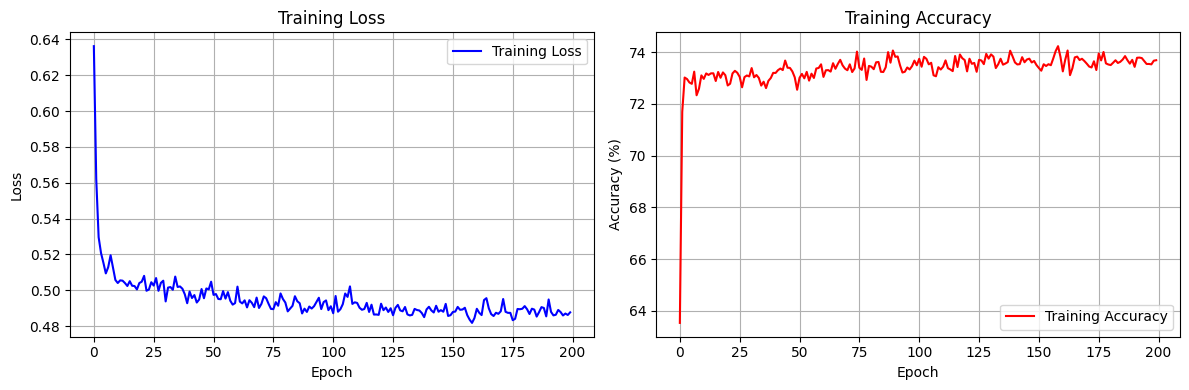

In [63]:
# Graficar los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Gráfico de pérdida
plt.subplot(1, 2, 1)
plt.plot(train_losses, 'b-', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Gráfico de accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, 'r-', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Note: you may need to restart the kernel to use updated packages.


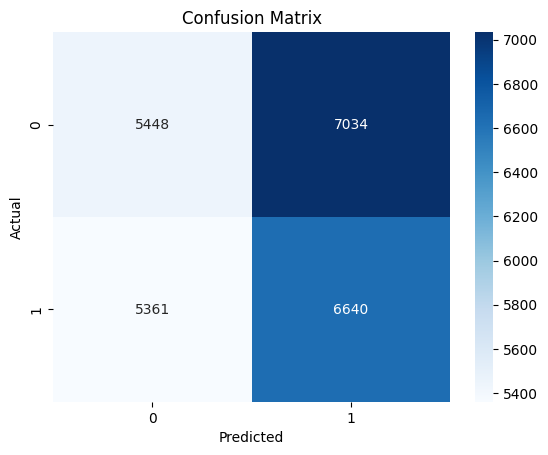

In [64]:
%pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

import torch

# y_true is a list of [features_tensor, labels_tensor] for each batch, so extract the labels
y_true_flat = torch.cat([batch[1] for batch in y_true]).cpu().numpy()
# y_pred is a list of tensors, so concatenate them
y_pred_flat = torch.cat(y_pred).cpu().numpy()

cm = confusion_matrix(y_true_flat, y_pred_flat)


sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## ¿Concluciones?

Una vez hecha las predicciones del modelos, se puede determinar que el modelo reliza las predicciones con una precision del 71.87% con los datos de prueba y con un 71.50% con los datos de entrenamiento, puede considerarse casi buena, esto devido a que en un torneo de CS:GO las partidas son demasiado importantes, y tener el modelo con esta precision puede llegar a generar desconfianza.

### ¿Cuales son los mejores hiperparametros?

Se eligio aquellos hiperparametros de acuerdo a la grafica de costo realizada para cada modelo, guiandonos en que la grafica de costo no este muy curveada pero tampoco que este demasiado recta. A continuacion se muestra los hiperparametros seleccionados:

* **Capa de entrada:** Es la cantidad de caracteristicas con las que cuenta el dataset.
* **Capa de salida:** como este modelo cuenta con dos clases, por lo tanto solo tendra un valor de 2

* **learning_rate.-** el la tasa de aprendisaje, para este hiperparametro se definio con el valor de 0.001, porque cada vez que se disminuia el valor de este, la precision decaia en un 51.5%, pero si se mantenia se llegaba por encima del 60%.
* **batch_size.-** este hiperparametro nos indica la cantidad que tendra cada lote, se eligio el valor de 1000 guiandonos con la precision con los datos de entrenamiento y de prueba, si el valor era demasiado alto, como 10000 la precision rondaba entre los 61%, pero si lo reduciamos a 100 o 64, la precision llegaba a ser entre 51.6%, para una mejor precision se escogio el valor de 1000 por la preciosn que nos databa una precision de 71.87% y 71.50%.
* **num_epochs.-** para el numoero de epochs(epocas) se definio 3, esto porque se defnio de acuerdo a la precision y capacidad de computo, si se tenia un valor alto, el entrenamiento tardaba mas y la precision era pesima, pero si el valor era entre 1 o 2, el entrenamiento era muy rapido, pero la precision pesima, llegando a la conclucion de escoger el valor de 3, que nos daba una mejor precision y el tiempo de entrenamiento era demasiado corto.